In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [1]:
proton_mass = 1.67E-27
m = 9*proton_mass
q = e = 1.6E-19
# Valeurs par défaut
B = 2 # Tesla
Q = -300/1E-2**2 # 300V/cm^2

In [3]:
def acceleration(r, v, Q, B):
    x, y, z = r
    E = -Q * np.array([x, y, -2*z])
    B = np.array([0, 0, B])
    return q*(E + np.cross(v, B))/m

r_0 = np.array([0, 100E-6, 50E-6])
v_0 = np.array([10, 0, 11.2])

acceleration(r_0, v_0, Q, B)

array([ 0.00000000e+00,  2.98070526e+09, -3.19361277e+09])

In [5]:
def f(t, y, Q, B):
    r = y[0:3]
    v = y[3:6]
    a = acceleration(r, v, Q, B)
    return np.concatenate((v, a))

y_0 = np.concatenate((r_0, v_0))
f(0, y_0, Q, B)

array([ 1.00000000e+01,  0.00000000e+00,  1.12000000e+01,  0.00000000e+00,
        2.98070526e+09, -3.19361277e+09])

In [36]:
def trajectoire(r_0, v_0, t_array, Q, B):
    y_0 = np.concatenate((r_0, v_0))
    t_f = t_array[-1]
    res = solve_ivp(f, [0, t_f], y_0, args=(Q, B), t_eval=t_array)
    return res.y

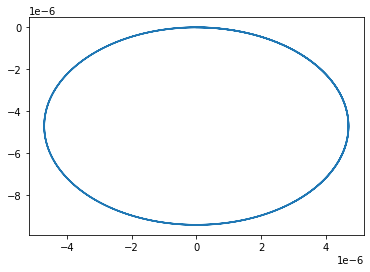

In [37]:
t_f = 1E-6
t_array = np.linspace(0, t_f, 1000)

r_0 = np.array([0, 0E-6, 0E-6])
v_0 = np.array([100, 0, 0])

x, y, z, vx, vy, vz = trajectoire(r_0, v_0, t_array, 0, B)

plt.plot(x, y)

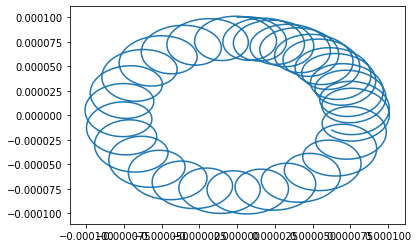

In [47]:
t_f = 10E-6
t_array = np.linspace(0, t_f, 2000)

r_0 = np.array([0, 100E-6, 0E-6])
v_0 = np.array([500, 100, 1])

x, y, z, vx, vy, vz = trajectoire(r_0, v_0, t_array, Q/2, B)

plt.plot(x, y)

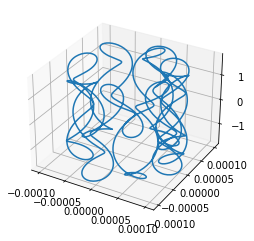

In [48]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(x, y, z)